# Theory

Рассмотрим два временных ряда $F^{(1)} = F_{N_1}^{(1)} = C_1sin(2\pi w_1 n + \phi_1)$ и $F^{(2)} = F_{N_2}^{(2)} = C_2sin(2\pi w_2 n + \phi_2)$.

Зададим число $L: 2 \leq L \leq min(N_1 - 1, N_2)$. Обозначим $\mathfrak{L}^{(L, 1)}$ линейное пространство, натянутое на $L$-сдвинутые векторы ряда $F^{(1)}$.

Пусть $ U_l^{(1)} (l = 1, \dotsc, L) $ - собственные векторы траекторной матрицы ряда $ F^{(1)} $. Для $ l > d = dim \; \mathfrak{L}^{(L, 1)}$ в качестве собственных векторов $ U_l^{(1)} $ мы берем векторы из любого ортонормированного базиса пространства, ортогонального $\mathfrak{L}^{(L, 1)}$.

Пусть $ I = \{i_1, \dotsc, i_r\} $ - подмножество $ \{1, \dotsc, L\} $ и $ \mathfrak{L}_r^{(1)} = span(U_l^{(1)}, l \in I) $. Обозначим через $ X_1^{(2)}, \dotsc, X_{K_2}^{(2)} (K_2 = N_2 - L + 1) $ $L$ - сдвинутые векторы временного ряда $F^{(2)}$.

Введем меру, называемую $\textbf{индексом неоднородности}$, которая характеризует несоответствие между рядом $F^{(2)}$ и структурой ряда $F^{(1)}$ (описываемого подпространством $ \mathfrak{L}_r^{(1)} $):
$$g(F^{(1)}; F^{(2)}) = \frac{\sum\limits_{l=1}^{K_2}dist^2(X_l^{(2)}, \mathfrak{L}_r^{(1)})}{\sum\limits_{l=1}^{K_2}\|X_l^{(2)}\|^2},$$
где $ dist(X, \mathfrak{L}) $ - Евклидово расстояние между вектором $X \in \mathbb{R}^L$ и линейным пространством $\mathfrak{L} \subset \mathbb{R}^L $. Значения $g$ принадлежат интервалу $[0, 1]$.
---

Пусть $w_1 = \frac{1}{10},\; w_2 = \frac{1}{5},\; C_1 = 1,\; C_2 = 1.3, \;phi_1 = 0,\; phi_2 = 0$

Строим траекторную матрицу $\mathrm{X}_{K x L}$ и запоминаем ее в переменную **th**:
```python
self.th = np.transpose(np.array(rssa.hankel(robjects.FloatVector(self.f), L = self.L)))
```
***

Считаем $\|X_l^{(2)}\|^2$:
```python
np.sum(self.th**2, axis=1)
```
***

Считаем $\sum\limits_{l=1}^{K_2}\|X_l^{(2)}\|^2$ для разных столбцов и запоминаем в **self.cth2_cumsum**:
```python
self.cth2_cumsum = np.r_[0, np.cumsum(np.sum(self.th**2, axis=1))]
```
***

Считаем сумму в знаменателе индекса неоднородности для соответствующего фиксированного базового подряда (векторная реализация для строки матрицы неоднородности).
```python
self.cth2 = (self.cth2_cumsum[(self.T - self.L + 1):(self.N - self.L + 1)] - self.cth2_cumsum[:(self.N - self.T)])
```
``` (self.T - self.L + 1) = self.KT ``` - Количество столбцов траекторной матрицы, содержащиеся в тестовом подряде исходного ряда.  



***

Для фиксировнных $ i \in [1, N-B+1] $ строковая функция неоднородности представляет собой ряд $ H_{N-T+1}^{(r, i)} $, общий член которого задается 
 
$$h_{n-1}^{(r, i)} = g_{in} = g(F_{i, i+B-1};\;F_{n, n+T-1}), \;\; n = 1, \dots, N-T+1.$$
 
Таким образом, ряд $ H_{N-T+1}^{(r, i)} $ соответствует $ i $-й строке матрицы $ \mathbf{G} $
 
Проходя через все базовые отрезки, мы считаем строковую функцию неоднородности - вызывая функцию **hc(idx)** и фиксируя базовый отрезок **self.f[idx:(idx + self.B + 1)]**

```python
h = np.r_[[hc(i) for i in range(0, self.N - self.B)]]
```

****

In [1]:
import time
from copy import deepcopy

import numpy as np

import matplotlib.pyplot as plt

from utils.hmatr import Hmatr

import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr

import plotly as py
import plotly.express as px
import plotly.graph_objs as go

%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

rpy2.robjects.numpy2ri.activate()
utils = importr('utils')
utils.chooseCRANmirror(ind=1)

# utils.install_packages('Rssa')

# library(Rssa)
rssa = importr('Rssa')

D:\Program Files\anaconda\envs\researchWork\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning:

pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.



In [4]:
N = 700
w1 = 1/10
w2 = 1/5
C1 = 1
C2 = 2
phi1 = 0
phi2 = np.pi/4
Q = 301  # 201 номер, значит разладка в ряде будет на 202й точке, если ряд задан с 0.
B = 100
T_ = 100
L = 50
r = 2

method = "eigen"

------

# Без шума

In [5]:
def plotSeries(s, title='Series', w=16, h=4):
    plt.figure(figsize=(w, h))
    plt.title(title)
    plt.plot(s)

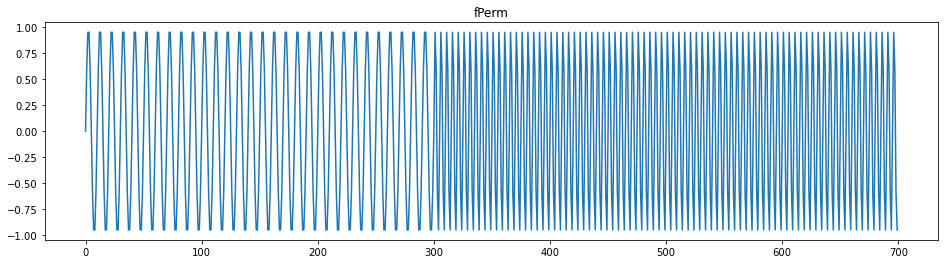

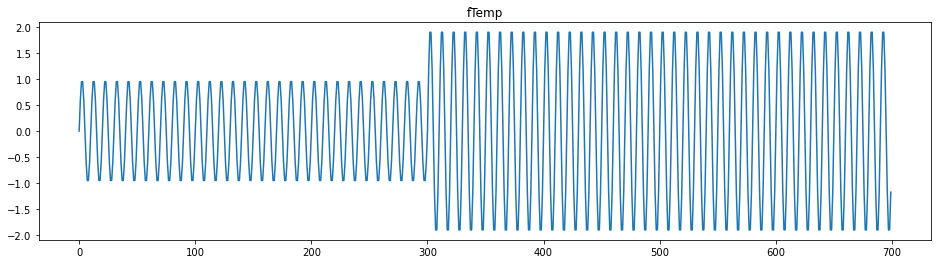

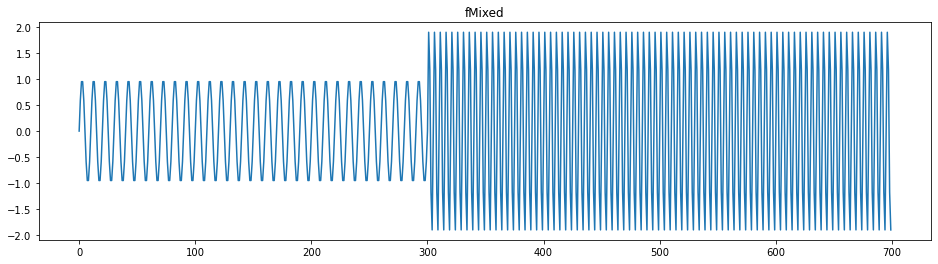

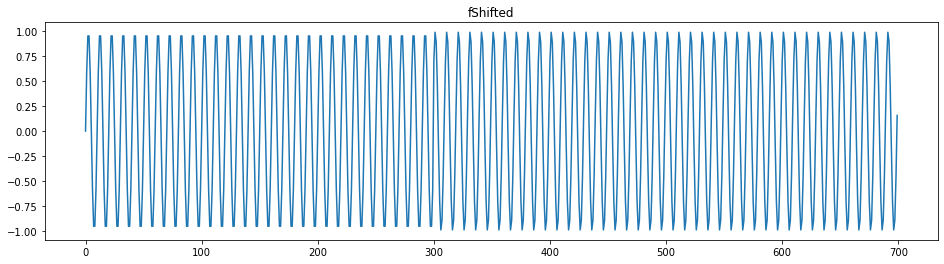

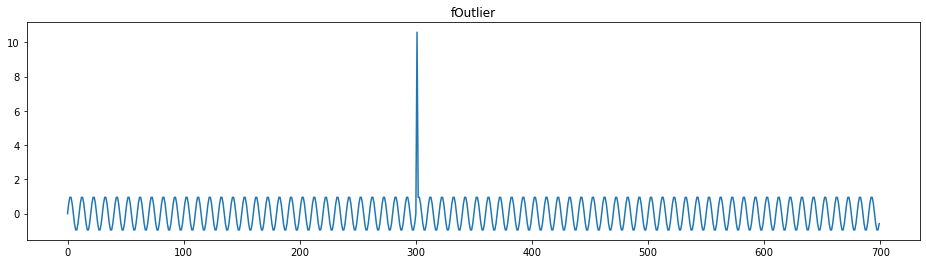

In [9]:
seriesPermanent = lambda n: C1*np.sin(2*np.pi*w1*n + phi1) if n < Q-1 else C1*np.sin(2*np.pi*w2*n + phi1)
seriesTemporary = lambda n: C1*np.sin(2*np.pi*w1*n + phi1) if n < Q-1 else C2*np.sin(2*np.pi*w1*n + phi1)
seriesMixed = lambda n: C1*np.sin(2*np.pi*w1*n + phi1) if n < Q-1 else C2*np.sin(2*np.pi*w2*n + phi1)
seriesShifted = lambda n: C1*np.sin(2*np.pi*w1*n + phi1) if n < Q-1 else C1*np.sin(2*np.pi*w1*n + phi2)
seriesOutlier = lambda n: C1*np.sin(2*np.pi*w1*n + phi1)


fPerm = [seriesPermanent(i) for i in range(N)]
fTemp = [seriesTemporary(i) for i in range(N)]
fMixed = [seriesMixed(i) for i in range(N)]
fShifted = [seriesShifted(i) for i in range(N)]

fOutlier = [seriesOutlier(i) for i in range(N)]
fOutlier[Q] = fOutlier[Q] + 10

plotSeries(fPerm, 'fPerm')
plotSeries(fTemp, 'fTemp')
plotSeries(fMixed, 'fMixed')
plotSeries(fShifted, 'fShifted')
plotSeries(fOutlier, 'fOutlier')

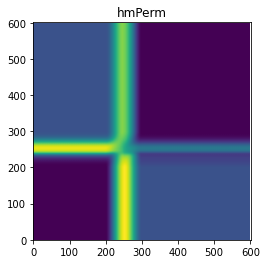

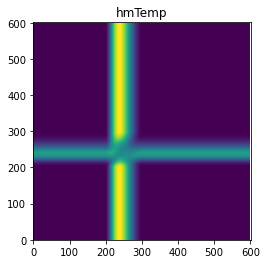

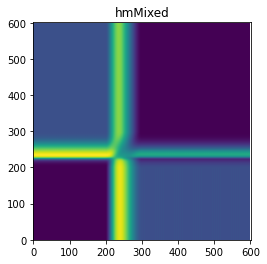

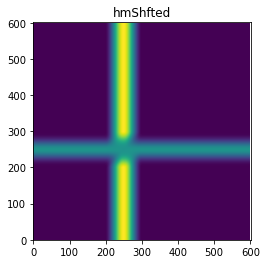

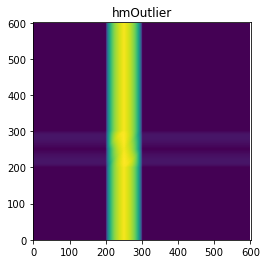

In [5]:
hmPerm = Hmatr(fPerm, B, T_, L, neig=r, svdMethod=method)
hmTemp = Hmatr(fTemp, B, T_, L, neig=r, svdMethod=method)
hmMixed = Hmatr(fMixed, B, T_, L, neig=r, svdMethod=method)
hmShfted = Hmatr(fShifted, B, T_, L, neig=r, svdMethod=method)
hmOutlier = Hmatr(fOutlier, B, T_, L, neig=r, svdMethod=method)

hmPerm.plotHm('hmPerm')
hmTemp.plotHm('hmTemp')
hmMixed.plotHm('hmMixed')
hmShfted.plotHm('hmShfted')
hmOutlier.plotHm('hmOutlier')

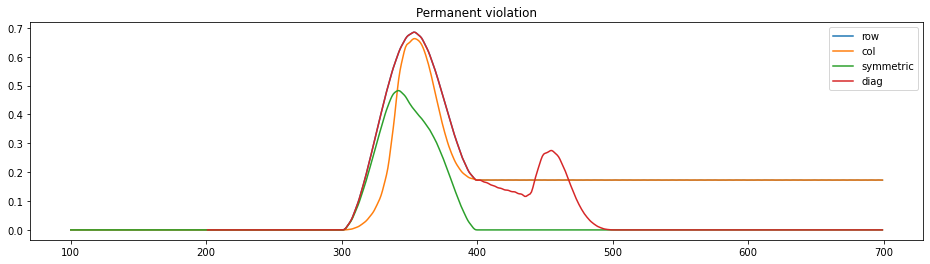

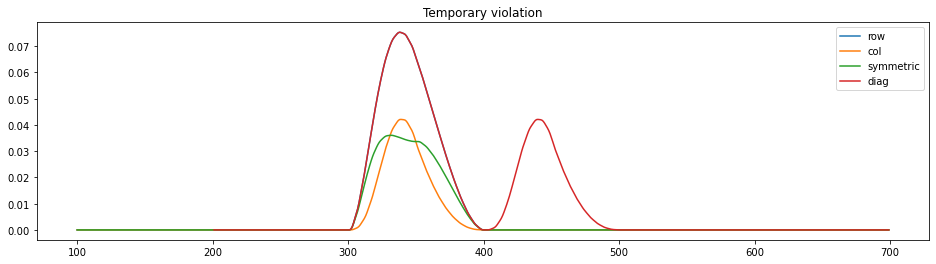

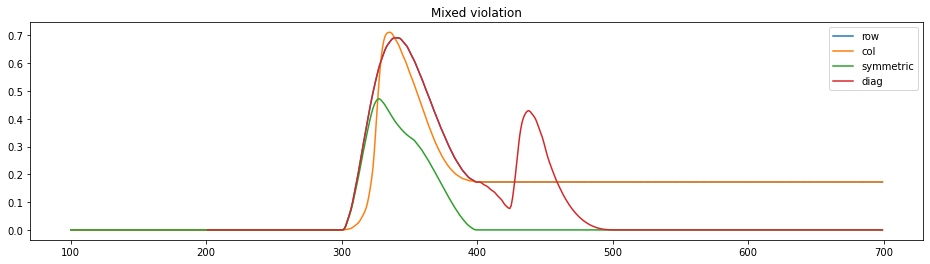

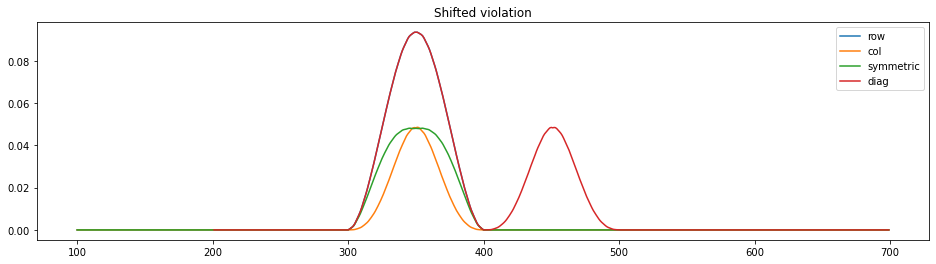

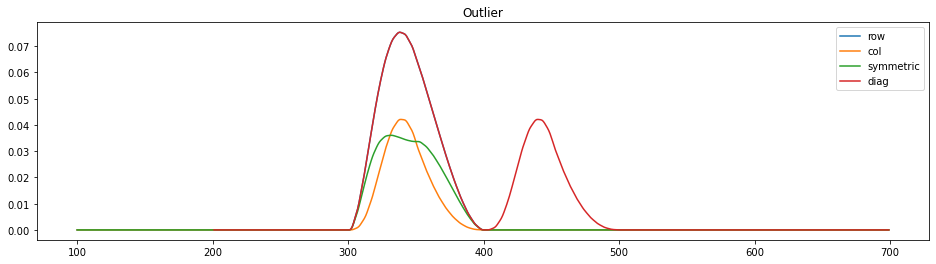

In [6]:
hmPerm.plotHeterFunc('Permanent violation')
hmTemp.plotHeterFunc('Temporary violation')
hmMixed.plotHeterFunc('Mixed violation')
hmShfted.plotHeterFunc('Shifted violation')
hmTemp.plotHeterFunc('Outlier')

# С шумом

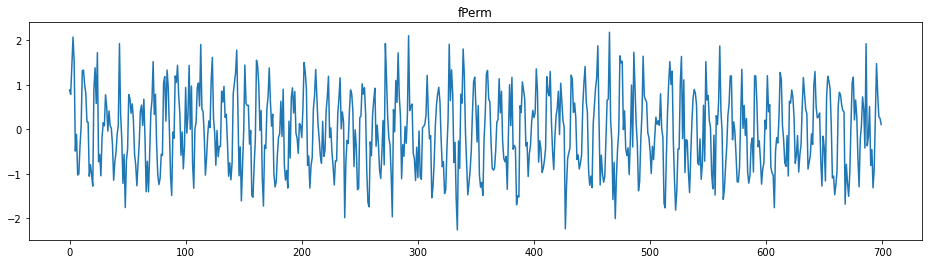

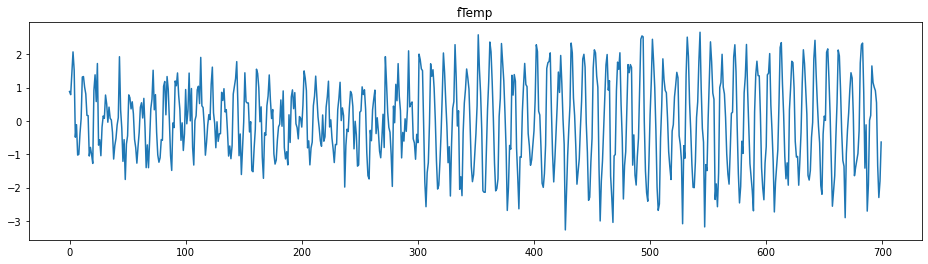

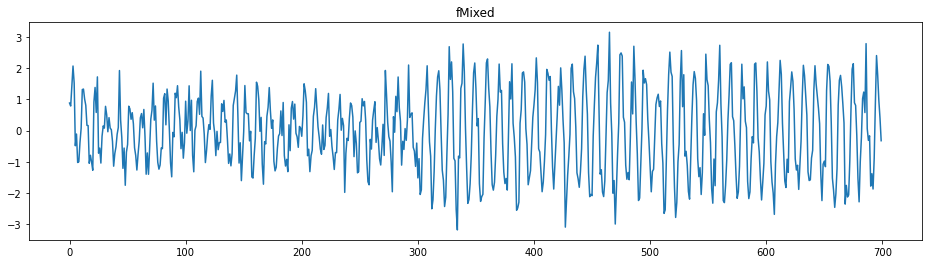

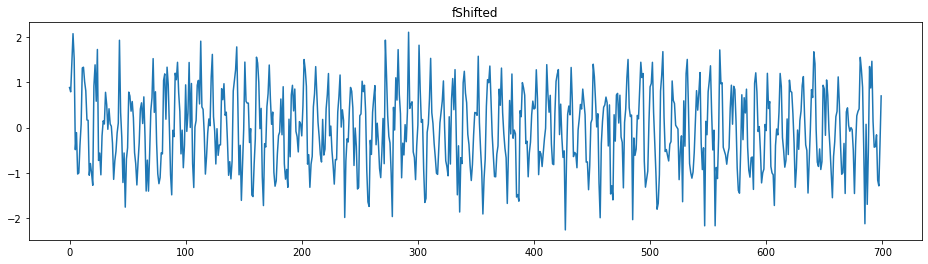

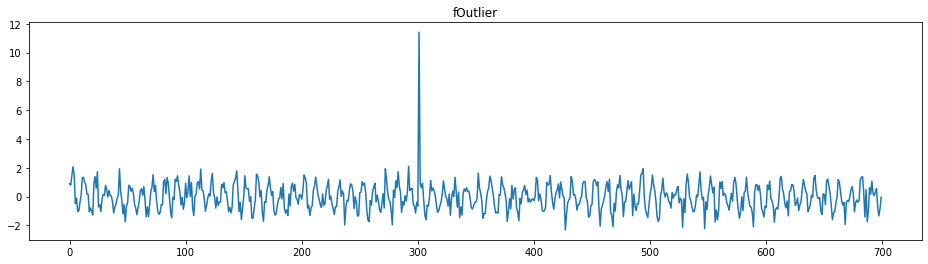

In [7]:
np.random.seed(0)
eps = np.random.randn(N) * 0.5

fPermNoise = fPerm + eps
fTempNoise = fTemp + eps
fMixedNoise = fMixed + eps
fShiftedNoise = fShifted + eps
fOutlierNoise = fOutlier + eps

plotSeries(fPermNoise, 'fPerm')
plotSeries(fTempNoise, 'fTemp')
plotSeries(fMixedNoise, 'fMixed')
plotSeries(fShiftedNoise, 'fShifted')
plotSeries(fOutlierNoise, 'fOutlier')

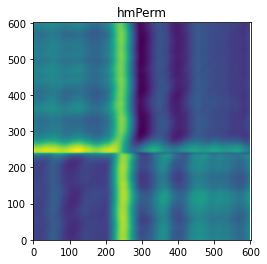

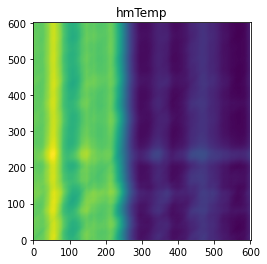

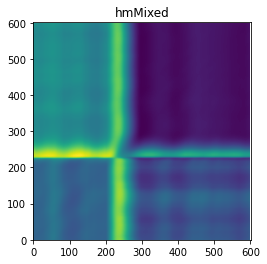

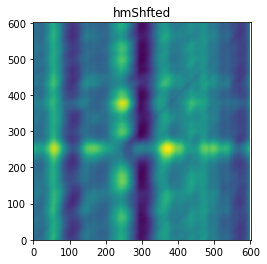

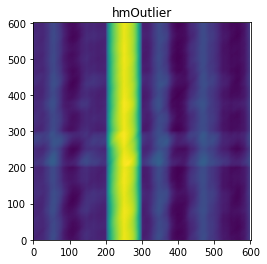

In [8]:
hmPermNoise = Hmatr(fPermNoise, B, T_, L, neig=r, svdMethod=method)
hmTempNoise = Hmatr(fTempNoise, B, T_, L, neig=r, svdMethod=method)
hmMixedNoise = Hmatr(fMixedNoise, B, T_, L, neig=r, svdMethod=method)
hmShftedNoise = Hmatr(fShiftedNoise, B, T_, L, neig=r, svdMethod=method)
hmOutlierNoise = Hmatr(fOutlierNoise, B, T_, L, neig=r, svdMethod=method)

hmPermNoise.plotHm('hmPerm')
hmTempNoise.plotHm('hmTemp')
hmMixedNoise.plotHm('hmMixed')
hmShftedNoise.plotHm('hmShfted')
hmOutlierNoise.plotHm('hmOutlier')

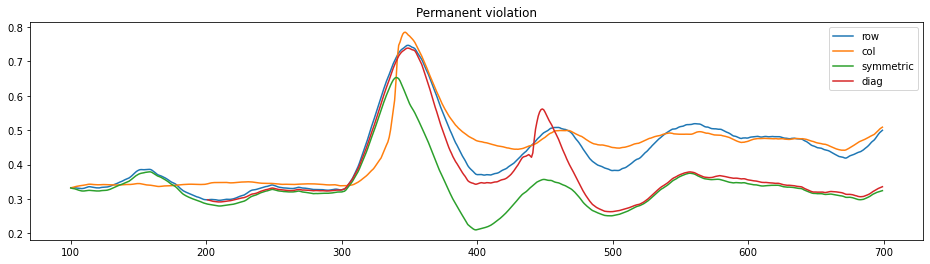

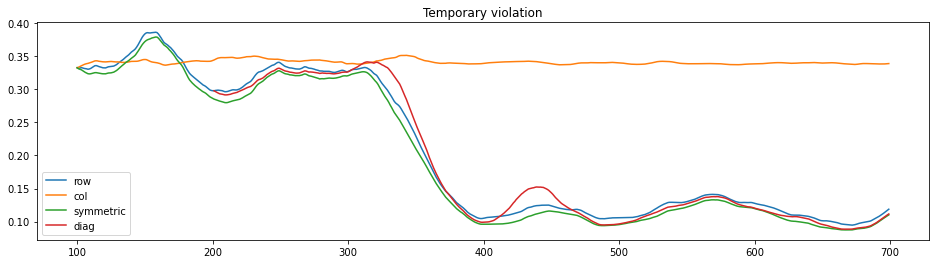

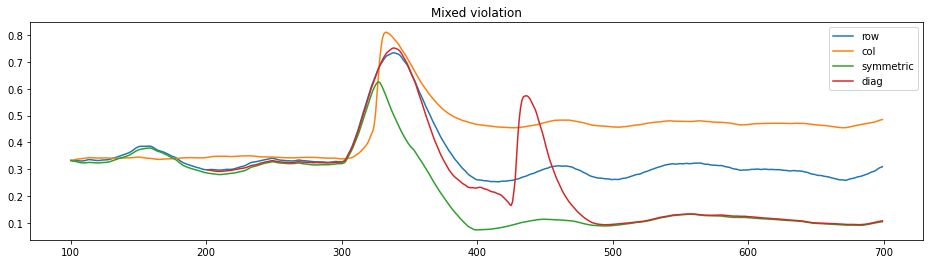

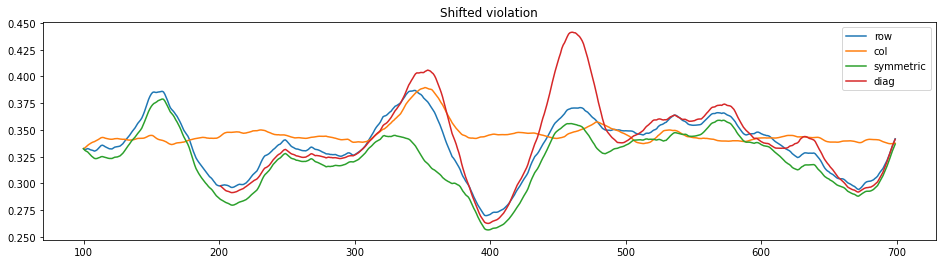

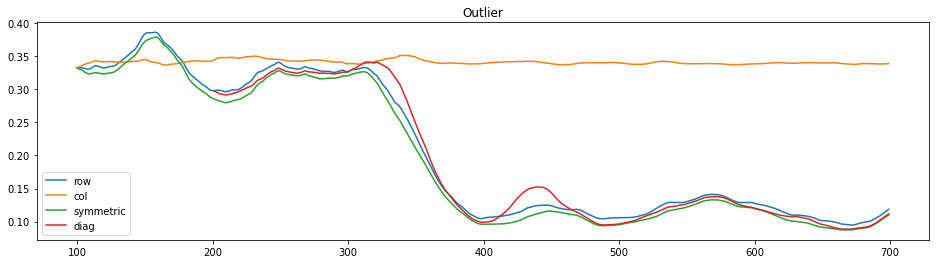

In [9]:
hmPermNoise.plotHeterFunc('Permanent violation')
hmTempNoise.plotHeterFunc('Temporary violation')
hmMixedNoise.plotHeterFunc('Mixed violation')
hmShftedNoise.plotHeterFunc('Shifted violation')
hmTempNoise.plotHeterFunc('Outlier')

----

# Попробуем оценить в числах какая из функций неоднородности лучше

# СОСРЕДОТОЧИТЬСЯ НА ОЦЕНКЕ ФУНКЦИЙ РАЗЛАДКИ, А НЕ ПОИСКЕ САМОЙ ТОЧКИ

Оценка скорости возрастания по норме

{'Diag': 0.13872124550496723, 'Row': 0.13872124550496723, 'Sym': 0.1264895241220363, 'Col': 0.013985239712466303}


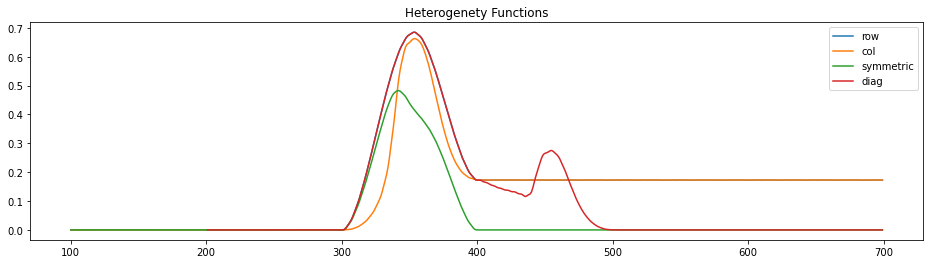

{'Row': 1.1667116452371322, 'Diag': 1.1618394445235563, 'Sym': 1.1391679205925875, 'Col': 1.130517058954556}


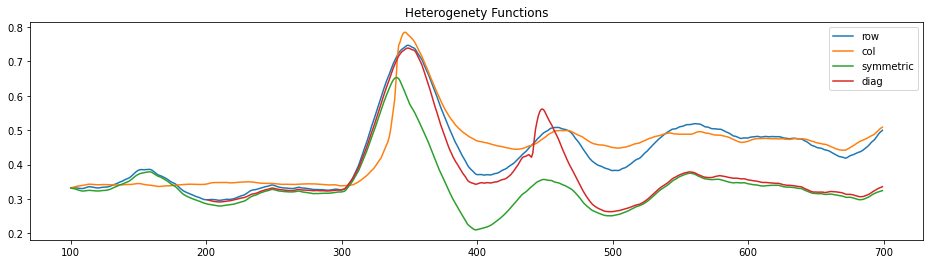

In [34]:
def normWindow(ser, n, Q, tail):
    return np.linalg.norm(ser[(Q-tail):(Q-tail+n+1)])

def sumWindow(ser, n, Q, tail):
    return np.sum(ser[(Q-tail):(Q-tail+n+1)])

def meanWindow(ser, n, Q, tail):
    return np.mean(ser[(Q-tail):(Q-tail+n+1)])
        
        
def rateOfIncrease(hm, n=10, typeN='norm'):
    if typeN=='norm':
        res = {
            'Row': normWindow(hm.getRow(), n, Q, hm.T),
            'Col': normWindow(hm.getCol(), n, Q, hm.B),
            'Sym': normWindow(hm.getSym(), n, Q, hm.T),
            'Diag': normWindow(hm.getDiag(), n, Q, hm.B + hm.T + 1)
        }
        
    if typeN=='sum':
        res = {
            'Row': sumWindow(hm.getRow(), n, Q, hm.T),
            'Col': sumWindow(hm.getCol(), n, Q, hm.B),
            'Sym': sumWindow(hm.getSym(), n, Q, hm.T),
            'Diag': sumWindow(hm.getDiag(), n, Q, hm.B + hm.T + 1)
        }
        
    if typeN=='mean':
        res = {
            'Row': meanWindow(hm.getRow(), n, Q, hm.T),
            'Col': meanWindow(hm.getCol(), n, Q, hm.B),
            'Sym': meanWindow(hm.getSym(), n, Q, hm.T),
            'Diag': meanWindow(hm.getDiag(), n, Q, hm.B + hm.T + 1)
        }
        
    sorted_tuples = sorted(res.items(), key=lambda item: item[1])
    sorted_res = {k: v for k, v in sorted_tuples[::-1]}

    print(sorted_res)
    

n = 10
rateOfIncrease(hmPerm, n, 'norm')
hmPerm.plotHeterFunc()
rateOfIncrease(hmPermNoise, n, 'norm')
hmPermNoise.plotHeterFunc()

{'Diag': 5.592352489663477, 'Row': 5.592352489663477, 'Sym': 4.936042306106887, 'Col': 1.2603233683860595}


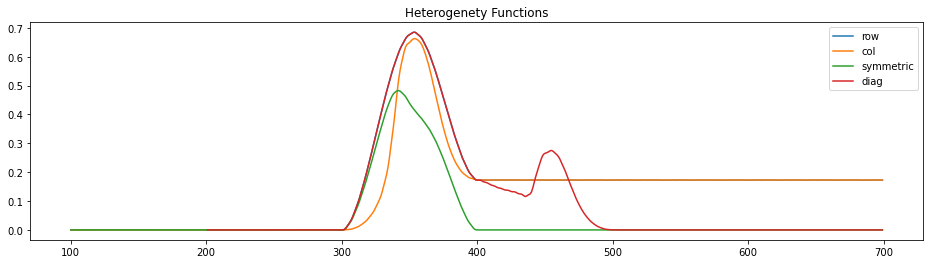

{'Row': 13.963203685352457, 'Diag': 13.63865218563244, 'Sym': 13.284557675478947, 'Col': 11.442556676292217}


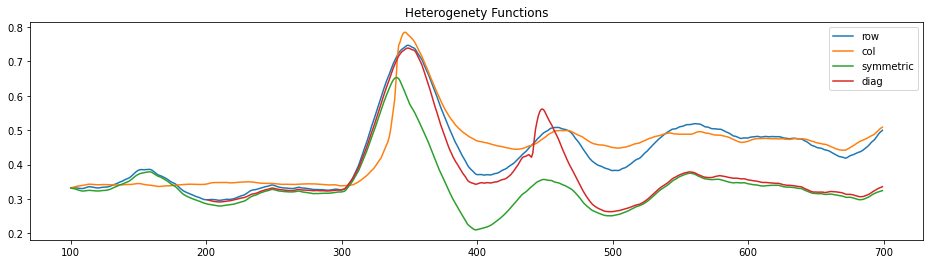

In [35]:
n = 30
rateOfIncrease(hmPerm, n, 'sum')
hmPerm.plotHeterFunc()
rateOfIncrease(hmPermNoise, n, 'sum')
hmPermNoise.plotHeterFunc()

{'Diag': [0.18039846740849924, 201], 'Row': [0.18039846740849924, 100], 'Sym': [0.15922717116473828, 100], 'Col': [0.040655592528582564, 100]}


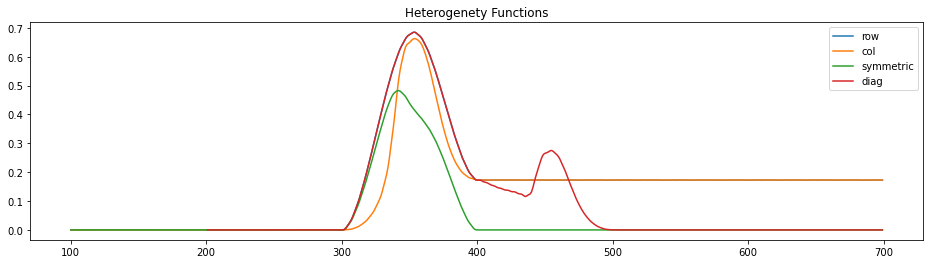

{'Row': [0.45042592533395026, 100], 'Diag': [0.43995652211717545, 201], 'Sym': [0.428534118563837, 100], 'Col': [0.3691147314932973, 100]}


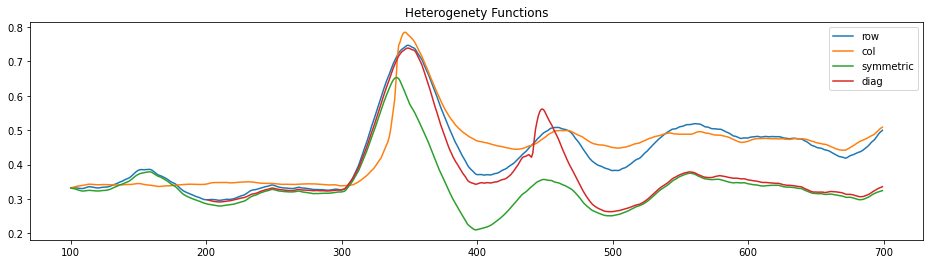

In [36]:
n = 30
rateOfIncrease(hmPerm, n, 'mean')
hmPerm.plotHeterFunc()
rateOfIncrease(hmPermNoise, n, 'mean')
hmPermNoise.plotHeterFunc()

Видим что во всех случаях `Row` возрастает не медленнее своих конкурентов.

* Добавить в вывод словаря среднее и значение функции в точке (для какого-то количества, можно просто с интервалом, например, в 30) **!!!!!**

## Сравнить:
* Скорость возрастания
* Момент преодоления точки максимума отдельно для каждой функции
* Момент преодоления n-й с конца точки максимума отдельно для каждой функции

Предполагаем что точку разладки мы знаем, а так же пока сравнивать постоянную разладку для строковой и столбцовой функций.

Как ведут себя функции разладки при добавлении шума (их численные оценки).

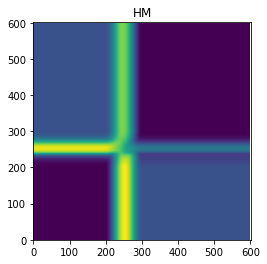

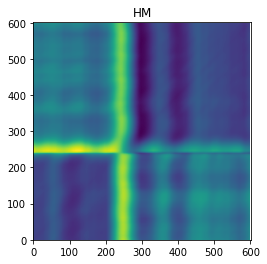

In [17]:
hmPerm.plotHm()
hmPermNoise.plotHm()

#### Последовательные 2 точки

{'Row': 301, 'Col': 301, 'Sym': 301, 'Diag': 301}


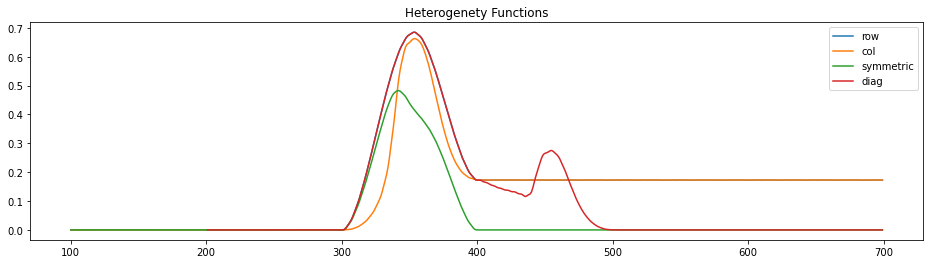

{'Row': 102, 'Col': 102, 'Sym': 110, 'Diag': 210}


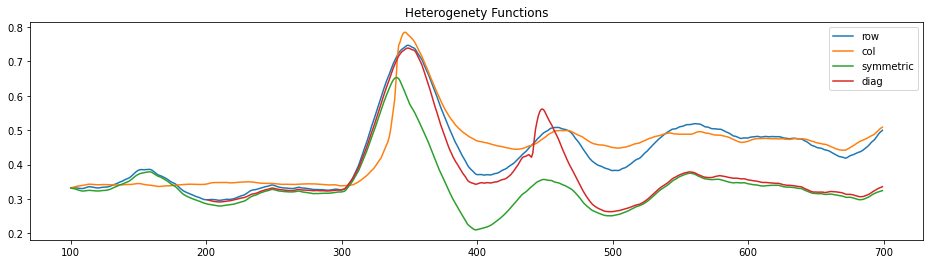

In [18]:
def findСonsistently(ser):
    for i in range(1, N):
        if round(ser[i], 10) < round(ser[i+1], 10):
            return i+1

def rateOfIncrease(hm):
    res = {
        'Row': findСonsistently(hm.getRow()) + hm.T,
        'Col': findСonsistently(hm.getCol()) + hm.B,
        'Sym': findСonsistently(hm.getSym()) + hm.T,
        'Diag': findСonsistently(hm.getDiag()) + hm.B + hm.T + 1
    }
    sorted_tuples = sorted(res.items(), key=lambda item: item[1])
    sorted_res = {k: v for k, v in sorted_tuples}

    print(sorted_res)

    
rateOfIncrease(hmPerm)
hmPerm.plotHeterFunc()

rateOfIncrease(hmPermNoise)
hmPermNoise.plotHeterFunc()

Сравнивать точки последовательно и на этом оценивать скорость возрастания некорректно для данных с шумом.

##### Нормы 

{'Diag': 0.5730594108599488, 'Row': 0.5730594108599488, 'Sym': 0.5087701867714705, 'Col': 0.09391579192220219}


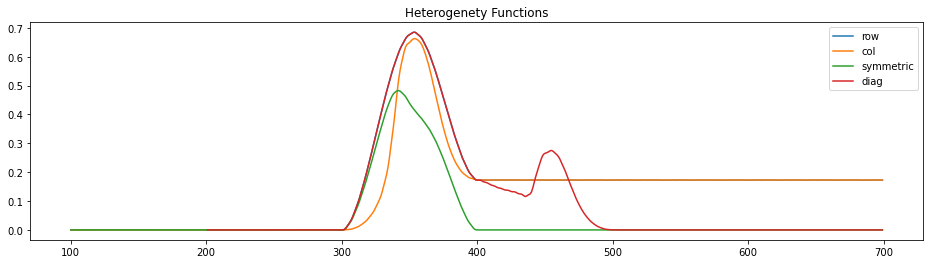

{'Row': 1.829796352723624, 'Diag': 1.7971024075182385, 'Sym': 1.75579632710258, 'Col': 1.6106208771454706}


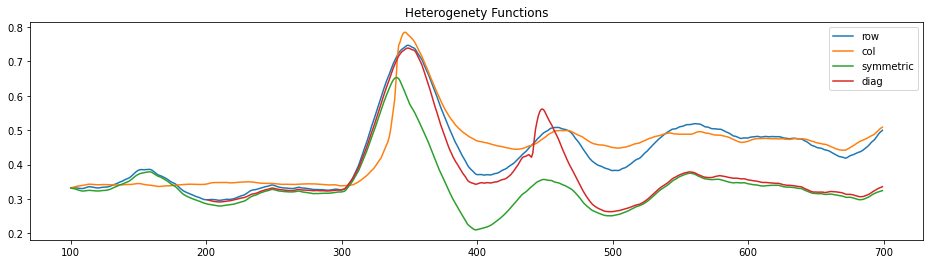

In [19]:
def findСonsistentlyNorm(ser, Q, tail):
    number = 0
    for i in range(Q, N-tail):
        if round(ser[i], 10) < round(ser[i+1], 10):
            number = i+1
            break
    return np.linalg.norm(ser[number:(n+1)])

def rateOfIncrease(hm, n=10):
    res = {
        'Row': normWindow(hm.getRow(), n, Q, hm.T),
            'Col': normWindow(hm.getCol(), n, Q, hm.B),
            'Sym': normWindow(hm.getSym(), n, Q, hm.T),
            'Diag': normWindow(hm.getDiag(), n, Q, hm.B + hm.T + 1)
    }
    sorted_tuples = sorted(res.items(), key=lambda item: item[1])
    sorted_res = {k: v for k, v in sorted_tuples[::-1]}

    print(sorted_res)
    
    
n=20

rateOfIncrease(hmPerm, n)
hmPerm.plotHeterFunc()

rateOfIncrease(hmPermNoise, n)
hmPermNoise.plotHeterFunc()

#### Преодоление максимума

{'Row': 301, 'Col': 301, 'Sym': 301, 'Diag': 301}


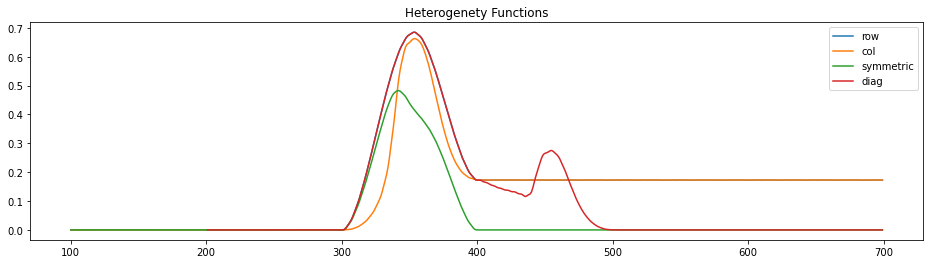

{'Diag': 303, 'Row': 312, 'Sym': 312, 'Col': 313}


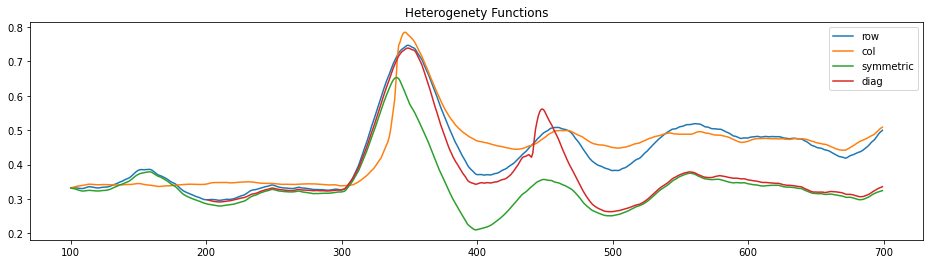

In [20]:
def findOvercomingMax(ser, Q, tail):
    maxVal = np.max(ser[:(Q-tail)])
    for i in range(1, len(ser)):
        if round(ser[i], 15) > round(maxVal, 15):
            return i
        
        
def rateOfIncrease(hm):
    res = {
        'Row': findOvercomingMax(hm.getRow(), Q, hm.T) + hm.T,
        'Col': findOvercomingMax(hm.getCol(), Q, hm.B) + hm.B,
        'Sym': findOvercomingMax(hm.getSym(), Q, hm.T) + hm.T,
        'Diag': findOvercomingMax(hm.getDiag(), Q, hm.B + hm.T + 1) + hm.B + hm.T + 1
    }
    sorted_tuples = sorted(res.items(), key=lambda item: item[1])
    sorted_res = {k: v for k, v in sorted_tuples}

    print(sorted_res)
    

rateOfIncrease(hmPerm)
hmPerm.plotHeterFunc()

rateOfIncrease(hmPermNoise)
hmPermNoise.plotHeterFunc()

#### Преодоление `n-й` с конца точки максимума.

{'Row': 301, 'Col': 301, 'Sym': 301, 'Diag': 301}


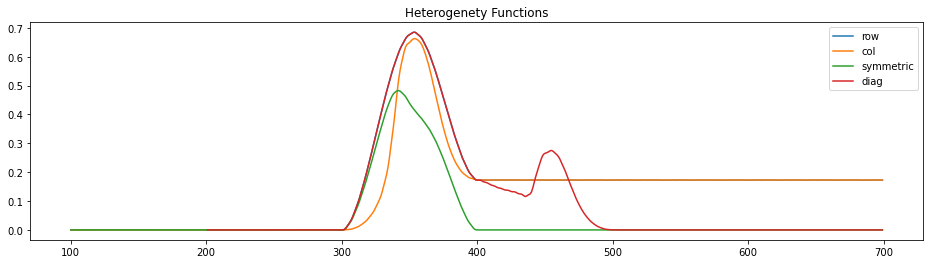

{'Diag': 301, 'Row': 311, 'Sym': 312, 'Col': 313}


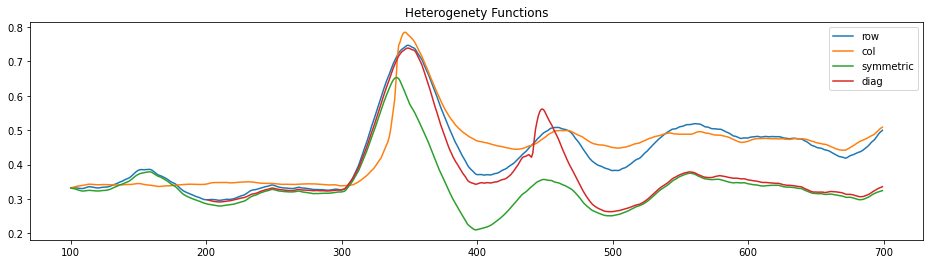

In [29]:
def findOvercomingMaxN(ser, n, Q, tail):
    maxVal = np.sort(ser[:(Q-tail)])[-n]
    for i in range((Q-tail), len(ser)):
        if round(ser[i], 15) > round(maxVal, 15):
            return i
        
        
def rateOfIncrease(hm, n):
    res = {
        'Row': findOvercomingMaxN(hm.getRow(), n, Q, hm.T) + hm.T,
        'Col': findOvercomingMaxN(hm.getCol(), n, Q, hm.B) + hm.B,
        'Sym': findOvercomingMaxN(hm.getSym(), n, Q, hm.T) + hm.T,
        'Diag': findOvercomingMaxN(hm.getDiag(), n, Q, hm.B + hm.T + 1) + hm.B + hm.T + 1
    }
    sorted_tuples = sorted(res.items(), key=lambda item: item[1])
    sorted_res = {k: v for k, v in sorted_tuples}

    print(sorted_res)
    
    
n = 10
rateOfIncrease(hmPerm, n)
hmPerm.plotHeterFunc()

rateOfIncrease(hmPermNoise, n)
hmPermNoise.plotHeterFunc()

## Моделирование

Смоделируем случайный шум с дисперсией `0.25` `10000` раз на отрезке $[0, \cdots, Q-1]$ и посчитаем характеристики:
* Средний максимум;
* 95 процентиль.

In [37]:
import openpyxl
import pandas as pd

In [53]:
wb = openpyxl.load_workbook(filename = 'tables/results.xlsx')
sheet = wb['Modelling']

resModelling = pd.read_excel('tables/results.xlsx', sheet_name='Modelling', engine='openpyxl')
resModelling.head()

,Unnamed: 0,row,col,sym,diag,Unnamed: 5,Unnamed: 6,#Iter
0,meanMax,0.393034,0.336349,0.385126,0.372978,NaN,NaN,10000.0
1,variance,0.001652,0.000027,0.001635,0.001041,NaN,NaN,NaN
2,95% quantile,0.387389,0.334924,0.378801,0.369264,NaN,NaN,NaN


### Преодоление среднего максимума

{'Diag': 328, 'Row': 329, 'Sym': 331, 'Col': 338}


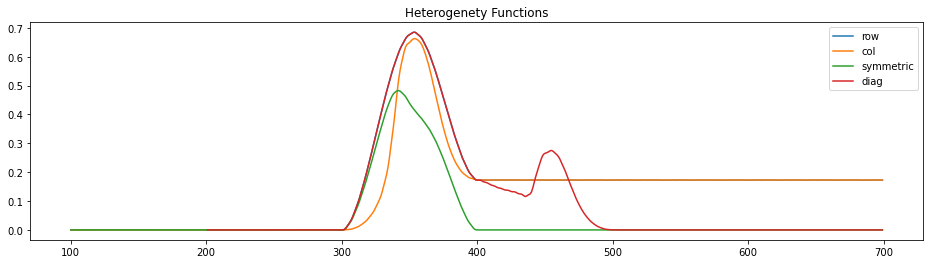

{'Col': 301, 'Diag': 310, 'Row': 312, 'Sym': 313}


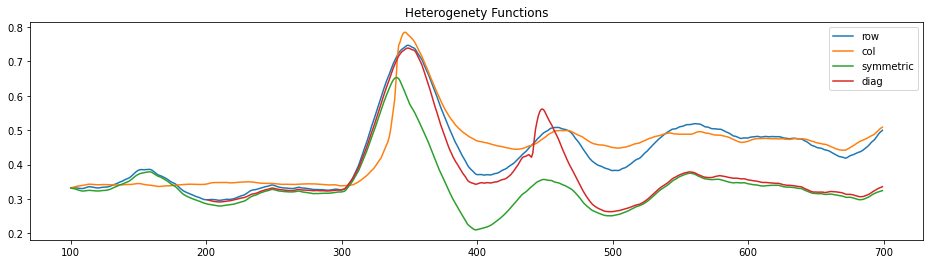

In [56]:
def findOvercomingMax(ser, Q, tail, typeF='row'):
    maxVal = resModelling[typeF][0]
    for i in range(Q-tail, len(ser)):
        if round(ser[i], 15) > round(maxVal, 15):
            return i
        
        
def rateOfIncrease(hm):
    res = {
        'Row': findOvercomingMax(hm.getRow(), Q, hm.T, 'row') + hm.T,
        'Col': findOvercomingMax(hm.getCol(), Q, hm.B, 'col') + hm.B,
        'Sym': findOvercomingMax(hm.getSym(), Q, hm.T, 'sym') + hm.T,
        'Diag': findOvercomingMax(hm.getDiag(), Q, hm.B + hm.T + 1, 'diag') + hm.B + hm.T + 1
    }
    sorted_tuples = sorted(res.items(), key=lambda item: item[1])
    sorted_res = {k: v for k, v in sorted_tuples}

    print(sorted_res)
    

rateOfIncrease(hmPerm)
hmPerm.plotHeterFunc()

rateOfIncrease(hmPermNoise)
hmPermNoise.plotHeterFunc()

### Преодоление 95% квантиля

{'Diag': 328, 'Row': 329, 'Sym': 331, 'Col': 338}


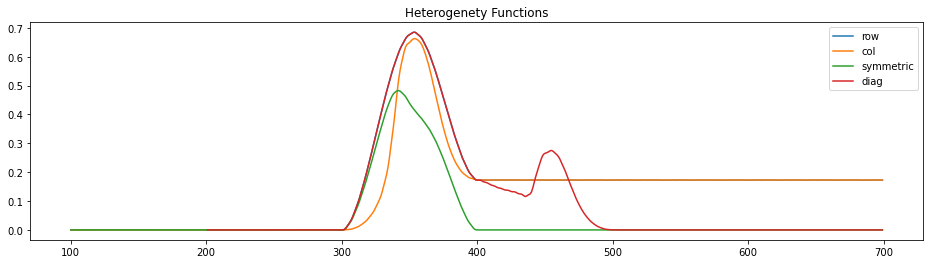

{'Col': 301, 'Diag': 310, 'Row': 312, 'Sym': 312}


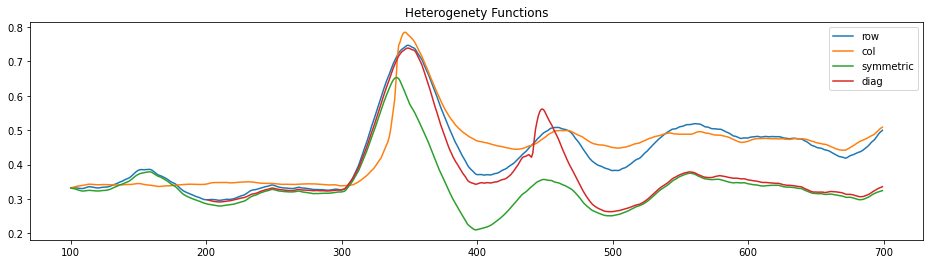

In [57]:
def findOvercomingMax(ser, Q, tail, typeF='row'):
    maxVal = resModelling[typeF][2]
    for i in range(Q-tail, len(ser)):
        if round(ser[i], 15) > round(maxVal, 15):
            return i
        
        
def rateOfIncrease(hm):
    res = {
        'Row': findOvercomingMax(hm.getRow(), Q, hm.T, 'row') + hm.T,
        'Col': findOvercomingMax(hm.getCol(), Q, hm.B, 'col') + hm.B,
        'Sym': findOvercomingMax(hm.getSym(), Q, hm.T, 'sym') + hm.T,
        'Diag': findOvercomingMax(hm.getDiag(), Q, hm.B + hm.T + 1, 'diag') + hm.B + hm.T + 1
    }
    sorted_tuples = sorted(res.items(), key=lambda item: item[1])
    sorted_res = {k: v for k, v in sorted_tuples}

    print(sorted_res)
    

rateOfIncrease(hmPerm)
hmPerm.plotHeterFunc()

rateOfIncrease(hmPermNoise)
hmPermNoise.plotHeterFunc()

## 1. Пересечение заданного порога

# Поиск точки разладки

### Пересечение порога значения функции разладки

In [364]:
def findHeterogenityPointByThreshold(ser=None, threshold=0.2, which='row'):
    for i in range(len(ser)):
        if ser[i] > threshold:
            print(f'Heterogenety detected at {i} point ({which})')
            return i
    print(f'No heterogenety ({which})')
    

def compareHeterogenityFunctionsThresh(hm, threshold=0.2):
    print('compareHeterogenityFunctionsByThresh:')
    findHeterogenityPointByThreshold(hm.getRow(n=0, sync=True, randInit=False), threshold, 'row')
    findHeterogenityPointByThreshold(hm.getCol(n=0, sync=True, randInit=False), threshold, 'col')
    findHeterogenityPointByThreshold(hm.getSym(sync=True, randInit=False), threshold, 'sym')
    findHeterogenityPointByThreshold(hm.getDiag(sync=True, randInit=False), threshold, 'diag')
    print()
    
    
def findHeterogenityPointByDifference(ser=None, n=20, which='row'):
    eps = 1e-5
    eps = 2 * eps
    for i in range(len(ser) - n):
        if ser[i + int(n/3)] + eps < ser[i + int(n/2)] and ser[i + int(n/2)] + eps < ser[i + int(n)]:
#             print(f'Heterogenety detected at {i+n} point ({which}) {ser[i + int(n/3)]}, {ser[i + int(n/2)]}, {ser[i + int(n)]}')
            print(f'Heterogenety detected at {i+n} point ({which})')
            return i
    print(f'No heterogenety ({which})')
    
    
def compareHeterogenityFunctionsDiff(hm, n=10):
    print('compareHeterogenityFunctionBysDiff:')
    findHeterogenityPointByDifference(hm.getRow(n=0, sync=True, randInit=False), n, 'row')
    findHeterogenityPointByDifference(hm.getCol(n=0, sync=True, randInit=False), n, 'col')
    findHeterogenityPointByDifference(hm.getSym(sync=True, randInit=False), n, 'sym')
    findHeterogenityPointByDifference(hm.getDiag(sync=True, randInit=False), n, 'diag')
    print()
    
    
def findHeterogenityPointByNorm(ser=None, n=20, which='row'):
    eps = 1e-5
    for i in range(len(ser) - n - 1):
        if np.linalg.norm(ser[i:(i+n)]) > np.linalg.norm(ser[(i-1):(i+n-1)]) + 2 * eps:
#             print(f'Heterogenety detected at {i+n} point ({which}) {ser[i + int(n/3)]}, {ser[i + int(n/2)]}, {ser[i + int(n)]}')
            print(f'Heterogenety detected at {i+n} point ({which})')
            return i
    print(f'No heterogenety ({which})')   
    
    
def compareHeterogenityFunctionsNorm(hm, n=20):
    print('compareHeterogenityFunctionsByNorm:')
    findHeterogenityPointByNorm(hm.getRow(n=0, sync=True, randInit=False), n, 'row')
    findHeterogenityPointByNorm(hm.getCol(n=0, sync=True, randInit=False), n, 'col')
    findHeterogenityPointByNorm(hm.getSym(sync=True, randInit=False), n, 'sym')
    findHeterogenityPointByNorm(hm.getDiag(sync=True, randInit=False), n, 'diag')
    print()

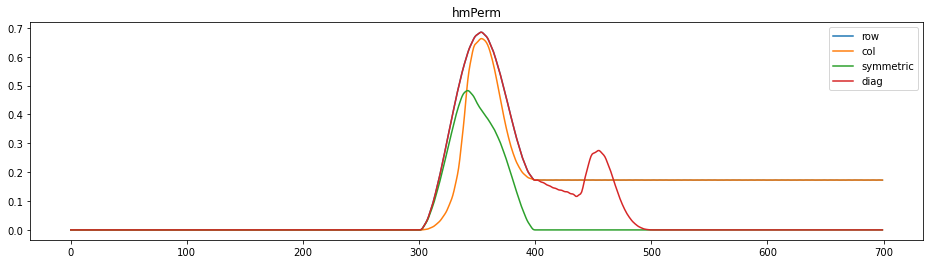

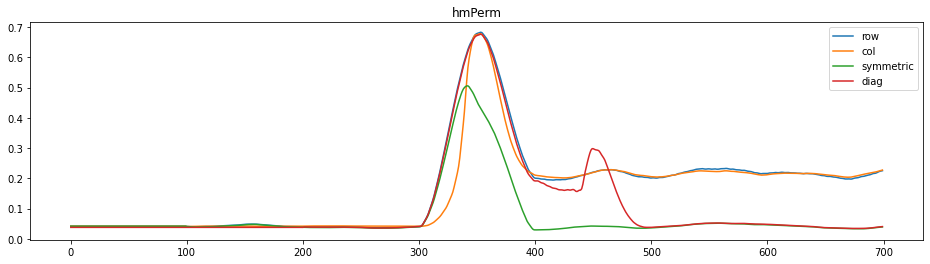

In [365]:
plotHeterFunc(hmPerm, 'hmPerm', True, False)
plotHeterFunc(hmPermNoise, 'hmPerm', True, False)

In [366]:
compareHeterogenityFunctionsThresh(hmPerm, 0.02)
compareHeterogenityFunctionsDiff(hmPerm, 20)
compareHeterogenityFunctionsNorm(hmPerm, 20)

compareHeterogenityFunctionsByThresh:
Heterogenety detected at 306 point (row)
Heterogenety detected at 315 point (col)
Heterogenety detected at 306 point (sym)
Heterogenety detected at 306 point (diag)

compareHeterogenityFunctionBysDiff:
Heterogenety detected at 311 point (row)
Heterogenety detected at 312 point (col)
Heterogenety detected at 311 point (sym)
Heterogenety detected at 311 point (diag)

compareHeterogenityFunctionsByNorm:
Heterogenety detected at 302 point (row)
Heterogenety detected at 303 point (col)
Heterogenety detected at 302 point (sym)
Heterogenety detected at 302 point (diag)



In [367]:
compareHeterogenityFunctionsThresh(hmPermNoise, 0.2)
compareHeterogenityFunctionsDiff(hmPermNoise, 50)
compareHeterogenityFunctionsNorm(hmPermNoise, 50)

compareHeterogenityFunctionsByThresh:
Heterogenety detected at 317 point (row)
Heterogenety detected at 332 point (col)
Heterogenety detected at 318 point (sym)
Heterogenety detected at 317 point (diag)

compareHeterogenityFunctionBysDiff:
Heterogenety detected at 137 point (row)
Heterogenety detected at 134 point (col)
Heterogenety detected at 139 point (sym)
Heterogenety detected at 233 point (diag)

compareHeterogenityFunctionsByNorm:
Heterogenety detected at 50 point (row)
Heterogenety detected at 50 point (col)
Heterogenety detected at 50 point (sym)
Heterogenety detected at 50 point (diag)



### Пересечение порога дифференцированных значений функции разладки

In [368]:
def applyDifferentiation(ser=None):
    if ser is None:
        print("No Series")
        return -1
    
    newSer = []
    for i in range(len(ser)-1):
        newSer.append(ser[i+1] - ser[i])
    return newSer


def compareDifferintiatedHeterogenityFunctionsThresh(hm, threshold=0.2):
    print('compareDifferintiatedHeterogenityFunctionsByThresh:')
    findHeterogenityPointByThreshold(applyDifferentiation(hm.getRow(n=0, sync=True, randInit=True)), threshold, 'row')
    findHeterogenityPointByThreshold(applyDifferentiation(hm.getCol(n=0, sync=True, randInit=True)), threshold, 'col')
    findHeterogenityPointByThreshold(applyDifferentiation(hm.getSym(sync=True, randInit=True)), threshold, 'sym')
    findHeterogenityPointByThreshold(applyDifferentiation(hm.getDiag(sync=True, randInit=True)), threshold, 'diag')
    print()
    
def compareDifferintiatedHeterogenityFunctionsDiff(hm, n=20):
    print('compareDifferintiatedHeterogenityFunctionsByDiff:')
    findHeterogenityPointByDifference(applyDifferentiation(hm.getRow(n=0, sync=True, randInit=True)), n, 'row')
    findHeterogenityPointByDifference(applyDifferentiation(hm.getCol(n=0, sync=True, randInit=True)), n, 'col')
    findHeterogenityPointByDifference(applyDifferentiation(hm.getSym(sync=True, randInit=True)), n, 'sym')
    findHeterogenityPointByDifference(applyDifferentiation(hm.getDiag(sync=True, randInit=True)), n, 'diag')
    print()
    
def compareDifferintiatedHeterogenityFunctionsNorm(hm, n=20):
    print('compareHeterogenityFunctionsByNorm:')
    findHeterogenityPointByNorm(applyDifferentiation(hm.getRow(n=0, sync=True, randInit=True)), n, 'row')
    findHeterogenityPointByNorm(applyDifferentiation(hm.getCol(n=0, sync=True, randInit=True)), n, 'col')
    findHeterogenityPointByNorm(applyDifferentiation(hm.getSym(sync=True, randInit=True)), n, 'sym')
    findHeterogenityPointByNorm(applyDifferentiation(hm.getDiag(sync=True, randInit=True)), n, 'diag')
    print()

    
def plotDiffHeterFunc(hm, title='Diffirintiated heterogenity functions', w=16, h=4):
    plt.figure(figsize=(w, h))
    plt.plot(applyDifferentiation(hm.getRow(n=0, sync=True, randInit=True)), label='row')
    plt.plot(applyDifferentiation(hm.getCol(n=0, sync=True, randInit=True)), label='row')
    plt.plot(applyDifferentiation(hm.getSym(sync=True, randInit=True)), label='sym')
    plt.plot(applyDifferentiation(hm.getDiag(sync=True, randInit=True)), label='diag')
    plt.ylim(-0.025, 0.025)

    plt.legend()
    plt.show()

In [369]:
compareDifferintiatedHeterogenityFunctionsThresh(hmPerm, 0.0008)
compareDifferintiatedHeterogenityFunctionsDiff(hmPerm, 50)
compareDifferintiatedHeterogenityFunctionsNorm(hmPerm, 80)

compareDifferintiatedHeterogenityFunctionsByThresh:
Heterogenety detected at 301 point (row)
Heterogenety detected at 307 point (col)
Heterogenety detected at 301 point (sym)
Heterogenety detected at 301 point (diag)

compareDifferintiatedHeterogenityFunctionsByDiff:
Heterogenety detected at 325 point (row)
Heterogenety detected at 326 point (col)
Heterogenety detected at 325 point (sym)
Heterogenety detected at 325 point (diag)

compareHeterogenityFunctionsByNorm:
Heterogenety detected at 301 point (row)
Heterogenety detected at 302 point (col)
Heterogenety detected at 301 point (sym)
Heterogenety detected at 301 point (diag)



In [371]:
compareDifferintiatedHeterogenityFunctionsThresh(hmPermNoise, 0.0008)
compareDifferintiatedHeterogenityFunctionsDiff(hmPermNoise, 50)
compareDifferintiatedHeterogenityFunctionsNorm(hmPermNoise, 50)

compareDifferintiatedHeterogenityFunctionsByThresh:
Heterogenety detected at 301 point (row)
Heterogenety detected at 306 point (col)
Heterogenety detected at 301 point (sym)
Heterogenety detected at 200 point (diag)

compareDifferintiatedHeterogenityFunctionsByDiff:
Heterogenety detected at 121 point (row)
Heterogenety detected at 148 point (col)
Heterogenety detected at 113 point (sym)
Heterogenety detected at 283 point (diag)

compareHeterogenityFunctionsByNorm:
Heterogenety detected at 50 point (row)
Heterogenety detected at 100 point (col)
Heterogenety detected at 50 point (sym)
Heterogenety detected at 201 point (diag)



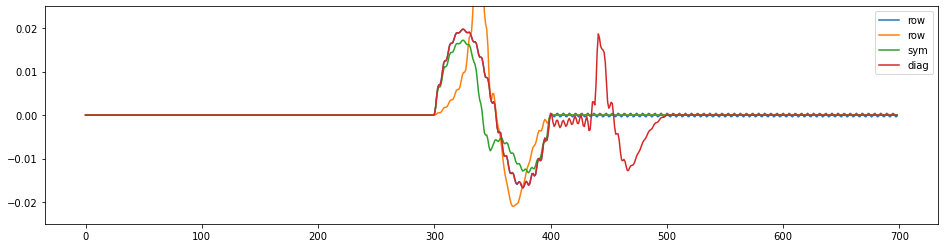

In [372]:
plotDiffHeterFunc(hmPerm, 'hmPerm')

## 2. Отклонение от среднего

In [373]:
def findHeterogenityPointByMean(ser=None, eps=1e-8, which='row'):
    eps = 1e-8
    if ser is None:
        print("No series")
        return -1
    
    for i in range(len(ser)):
        if ser[i] > np.mean(ser[:(i-1)]) + eps:
            print(f'Heterogenety detected at {i} point ({which})')
            print(f'f(i)={ser[i]}, mean={np.mean(ser[0:(i-1)])}\n')
            return i
    print(f'No heterogenety ({which})')

    
def compareHeterogenityFunctionsMean(hm, eps=1e-8):
    findHeterogenityPointByMean(hm.getRow(n=0, sync=True, randInit=False), eps, 'row')
    findHeterogenityPointByMean(hm.getCol(n=0, sync=True, randInit=False), eps, 'col')
    findHeterogenityPointByMean(hm.getSym(sync=True, randInit=False), eps, 'sym')
    findHeterogenityPointByMean(hm.getDiag(sync=True, randInit=False), eps, 'diag')

In [375]:
compareHeterogenityFunctionsMean(hmPerm, 1e-4)

Heterogenety detected at 301 point (row)
f(i)=0.00014172409005852593, mean=-1.4062824978585317e-17

Heterogenety detected at 301 point (col)
f(i)=5.387047333327288e-06, mean=2.3314683517128286e-17

Heterogenety detected at 301 point (sym)
f(i)=0.00013627012678674166, mean=1.1842378929335004e-17

Heterogenety detected at 301 point (diag)
f(i)=0.00014172409005852593, mean=-6.237973101027212e-17



In [376]:
compareHeterogenityFunctionsMean(hmPermNoise, 1e-4)

Heterogenety detected at 124 point (row)
f(i)=0.041667519873271, mean=0.041576847228906276

Heterogenety detected at 110 point (col)
f(i)=0.04176196680480049, mean=0.04175571696498488

Heterogenety detected at 129 point (sym)
f(i)=0.04151942726321045, mean=0.04138673103191487

Heterogenety detected at 201 point (diag)
f(i)=0.03939947905278329, mean=0.037969389944749465

